In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# References and links
### Reference notebboks
1. https://www.kaggle.com/code/docxian/blood-glucose-prediction-explorations#Model

# Loading Training Data and general EDA 

In [111]:
#load the data
train_csv = pd.read_csv("/kaggle/input/brist1d/train.csv")
train_csv.head()

/tmp/ipykernel_30/254834385.py:2: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train_csv = pd.read_csv("/kaggle/input/brist1d/train.csv")


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [112]:
# see the columns
train_csv.columns

Index(['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40',
       'bg-5:35', 'bg-5:30', 'bg-5:25',
       ...
       'activity-0:40', 'activity-0:35', 'activity-0:30', 'activity-0:25',
       'activity-0:20', 'activity-0:15', 'activity-0:10', 'activity-0:05',
       'activity-0:00', 'bg+1:00'],
      dtype='object', length=508)

In [113]:
#  training data description
train_csv.describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
count,149770.000000,158533.000000,163364.000000,149766.000000,158254.000000,163770.000000,149763.000000,157973.000000,164174.000000,149771.000000,...,141694.000000,141706.000000,141713.000000,141722.000000,141732.000000,141741.000000,141751.000000,141761.000000,141767.000000,177024.000000
mean,8.211018,8.230449,8.253291,8.210988,8.229649,8.254083,8.211049,8.228888,8.254602,8.211000,...,9.364063,9.364096,9.362525,9.366591,9.368108,9.366998,9.370010,9.372536,9.368960,8.277045
std,2.852188,2.913438,2.945594,2.852090,2.911313,2.947651,2.852212,2.909304,2.949689,2.852315,...,8.012264,8.012681,8.017508,8.018465,8.018349,8.023788,8.021999,8.023280,8.023327,2.996398
min,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,2.200000
25%,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,...,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,6.100000
50%,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,...,6.180000,6.180000,6.170000,6.180000,6.180000,6.180000,6.180000,6.180000,6.180000,7.700000
75%,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,...,9.060000,9.060000,9.050000,9.060000,9.060000,9.060000,9.060000,9.070000,9.060000,9.900000
max,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,...,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,27.800000


In [114]:
# column wise getting NaN values
train_csv.isnull().sum()

id                    0
p_num                 0
time                  0
bg-5:55           27254
bg-5:50           18491
                  ...  
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
bg+1:00               0
Length: 508, dtype: int64

In [115]:
# getting the percentage of missing values
missing_values = train_csv.isnull().sum()


total_rows = train_csv.shape[0]
missing_percentage = (missing_values / total_rows) * 100


results_df = pd.DataFrame({'Column': missing_values.index,
                          'Missing Values': missing_values.values,
                          'Missing Percentage (%)': missing_percentage.values})


results_df = results_df.sort_values(by='Missing Percentage (%)', ascending=False)
results_df.to_csv("/kaggle/working/percentage_of_missing_values.csv")
print(results_df)



         Column  Missing Values  Missing Percentage (%)
164  carbs-4:30          174496               98.571945
170  carbs-4:00          174492               98.569685
161  carbs-4:45          174491               98.569121
155  carbs-5:15          174490               98.568556
152  carbs-5:30          174490               98.568556
..          ...             ...                     ...
74      bg-0:00            2696                1.522957
0            id               0                0.000000
1         p_num               0                0.000000
2          time               0                0.000000
507     bg+1:00               0                0.000000

[508 rows x 3 columns]


In [116]:
# Get the structure of the data
train_csv.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Data columns (total 508 columns):
 #    Column         Non-Null Count   Dtype  
---   ------         --------------   -----  
 0    id             177024 non-null  object 
 1    p_num          177024 non-null  object 
 2    time           177024 non-null  object 
 3    bg-5:55        149770 non-null  float64
 4    bg-5:50        158533 non-null  float64
 5    bg-5:45        163364 non-null  float64
 6    bg-5:40        149766 non-null  float64
 7    bg-5:35        158254 non-null  float64
 8    bg-5:30        163770 non-null  float64
 9    bg-5:25        149763 non-null  float64
 10   bg-5:20        157973 non-null  float64
 11   bg-5:15        164174 non-null  float64
 12   bg-5:10        149771 non-null  float64
 13   bg-5:05        157677 non-null  float64
 14   bg-5:00        164585 non-null  float64
 15   bg-4:55        149780 non-null  float64
 16   bg-4:50        157381 non-null  float64
 17   bg-4:45 

In [117]:
# getting the time range
train_csv.time.describe()

count       177024
unique         288
top       11:55:00
freq           640
Name: time, dtype: object

In [118]:
# convert time to datetime dtype of pands
train_csv.time = pd.to_datetime(train_csv.time, format='%H:%M:%S')
train_csv.head(5)

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,1900-01-01 06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,1900-01-01 06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,1900-01-01 06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,1900-01-01 06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,1900-01-01 07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [119]:
train_csv.columns[train_csv.columns.str.startswith('cals-')]

Index(['cals-5:55', 'cals-5:50', 'cals-5:45', 'cals-5:40', 'cals-5:35',
       'cals-5:30', 'cals-5:25', 'cals-5:20', 'cals-5:15', 'cals-5:10',
       'cals-5:05', 'cals-5:00', 'cals-4:55', 'cals-4:50', 'cals-4:45',
       'cals-4:40', 'cals-4:35', 'cals-4:30', 'cals-4:25', 'cals-4:20',
       'cals-4:15', 'cals-4:10', 'cals-4:05', 'cals-4:00', 'cals-3:55',
       'cals-3:50', 'cals-3:45', 'cals-3:40', 'cals-3:35', 'cals-3:30',
       'cals-3:25', 'cals-3:20', 'cals-3:15', 'cals-3:10', 'cals-3:05',
       'cals-3:00', 'cals-2:55', 'cals-2:50', 'cals-2:45', 'cals-2:40',
       'cals-2:35', 'cals-2:30', 'cals-2:25', 'cals-2:20', 'cals-2:15',
       'cals-2:10', 'cals-2:05', 'cals-2:00', 'cals-1:55', 'cals-1:50',
       'cals-1:45', 'cals-1:40', 'cals-1:35', 'cals-1:30', 'cals-1:25',
       'cals-1:20', 'cals-1:15', 'cals-1:10', 'cals-1:05', 'cals-1:00',
       'cals-0:55', 'cals-0:50', 'cals-0:45', 'cals-0:40', 'cals-0:35',
       'cals-0:30', 'cals-0:25', 'cals-0:20', 'cals-0:15', 'cals

In [120]:
train_csv.time.describe()

count                           177024
mean     1900-01-01 11:56:31.746882048
min                1900-01-01 00:00:00
25%                1900-01-01 06:00:00
50%                1900-01-01 11:55:00
75%                1900-01-01 17:50:00
max                1900-01-01 23:55:00
Name: time, dtype: object

In [121]:
train_csv.time.value_counts()

time
1900-01-01 11:55:00    640
1900-01-01 16:45:00    638
1900-01-01 16:00:00    638
1900-01-01 15:45:00    638
1900-01-01 16:30:00    637
                      ... 
1900-01-01 00:55:00    594
1900-01-01 23:25:00    593
1900-01-01 22:25:00    593
1900-01-01 00:25:00    591
1900-01-01 00:10:00    590
Name: count, Length: 288, dtype: int64

In [122]:
# patient ids - training
count_train = train_csv.p_num.value_counts().sort_index()
count_train

p_num
p01     8459
p02    25872
p03    26028
p04    24686
p05     8288
p06     8383
p10    25454
p11    24555
p12    25299
Name: count, dtype: int64

In [123]:
train_csv.shape[0]

177024

# Plotting Data Distributions

## Plotting Target data distribution

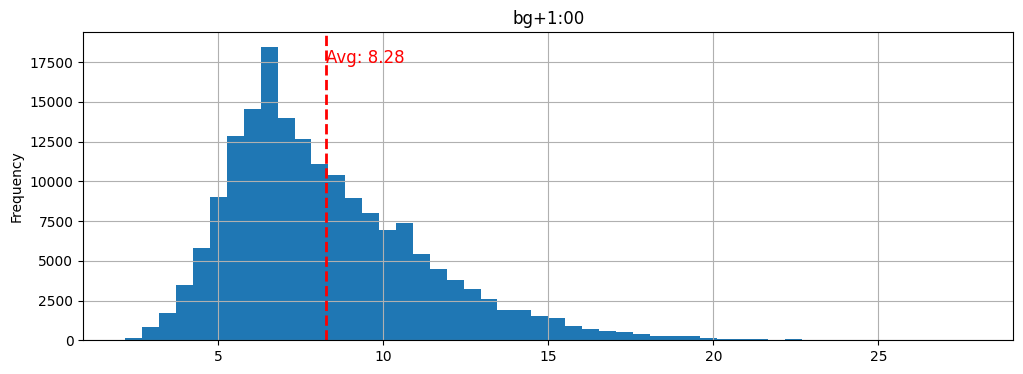

count    177024.000000
mean          8.277045
std           2.996398
min           2.200000
25%           6.100000
50%           7.700000
75%           9.900000
max          27.800000
Name: bg+1:00, dtype: float64


In [124]:
# get the target distribution
# plot target distribution
average_value = train_csv['bg+1:00'].mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
train_csv['bg+1:00'].plot(kind='hist', bins=50)
plt.title('bg+1:00')
# Add a vertical line for the average value
plt.axvline(average_value, color='red', linestyle='dashed', linewidth=2)
# Add annotation for the average value
plt.text(average_value, plt.gca().get_ylim()[1]*0.9, f'Avg: {average_value:.2f}', color='red', fontsize=12)
plt.grid()
plt.show()
# basic stats
print(train_csv['bg+1:00'].describe())

## Plotting Time Distributiom

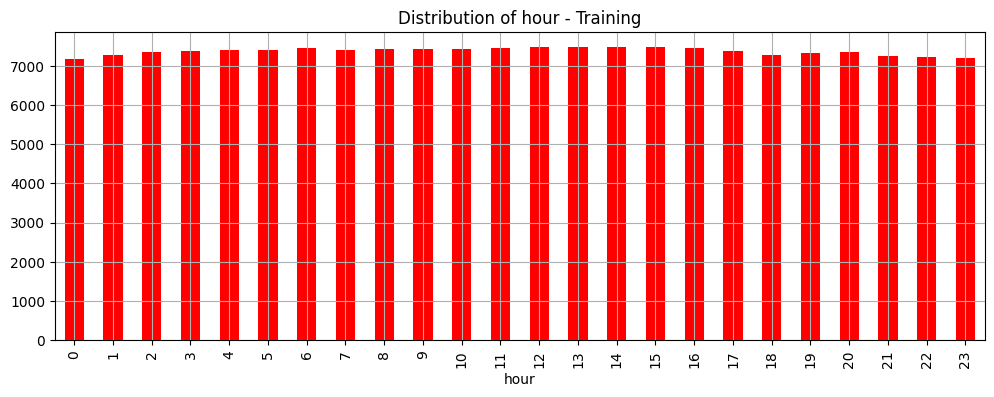

In [125]:
# extract hour

"""
Purpose : The result is a sorted count of how many times each unique hour value appears in the train_csv DataFrame.
"""
train_csv['hour'] = train_csv.time.apply(lambda x : x.hour)
# and show plot
plt.figure(figsize=(12,4))
train_csv.hour.value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Distribution of hour - Training')
plt.grid()
plt.show()

## Plotting target distribution w.r.t time (Violin Plot)

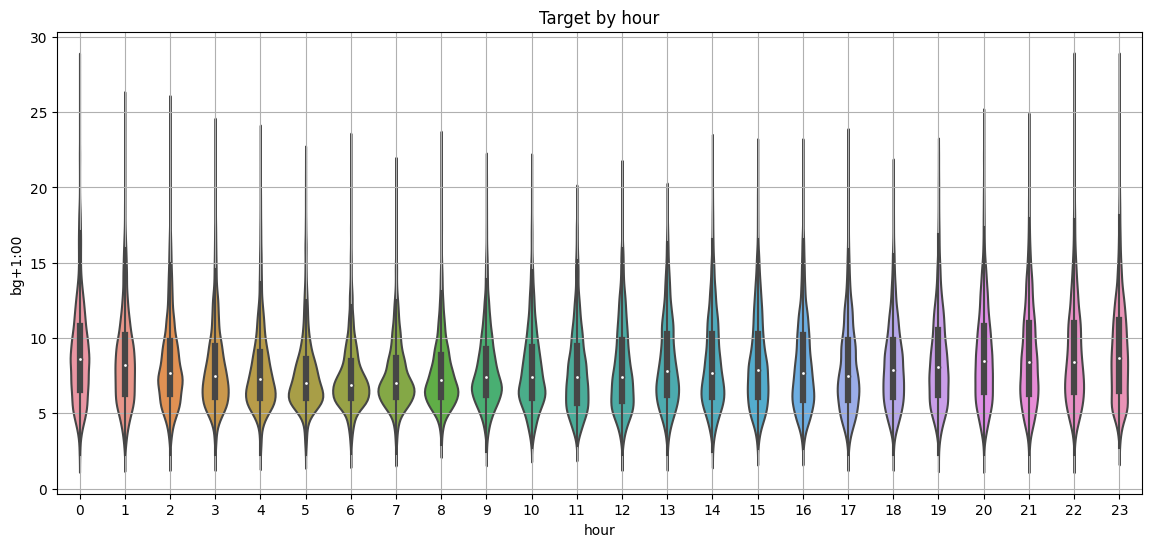

In [126]:
# plotting target vs hour
# plot target distribution by hour
import seaborn as sns
plt.figure(figsize=(14,6))
sns.violinplot(data=train_csv, x='hour', y='bg+1:00')
plt.title('Target by hour')
plt.grid()
plt.show()



### The following observations are made:
 1. The median blood glucose reduces a bit from hour 0 and then from hour 7 it starts increasing  with a slight dip at 4 PM and then again a slight incrase from 5 PM onwards.
 
 2. Might happen that during breakfast, lunch and dinner there is increase of blood sugar level.

### Activities List

1. Indoor
2. climbing
3. Run
4. Strength training
5. Swim
6. Bike
7. Dancing
8. Stairclimber
9. Spinning
10. Walking
11. HIIT
12. OutdoorBike
13. Walk
14. Aerobic Workout
15. Tennis
16. Workout
17. Hike
18. Zumba
19. Sport
20. Yoga
21. Swimming
22. Weights
23. Running



## Plotting target distribution w.r.t Patient

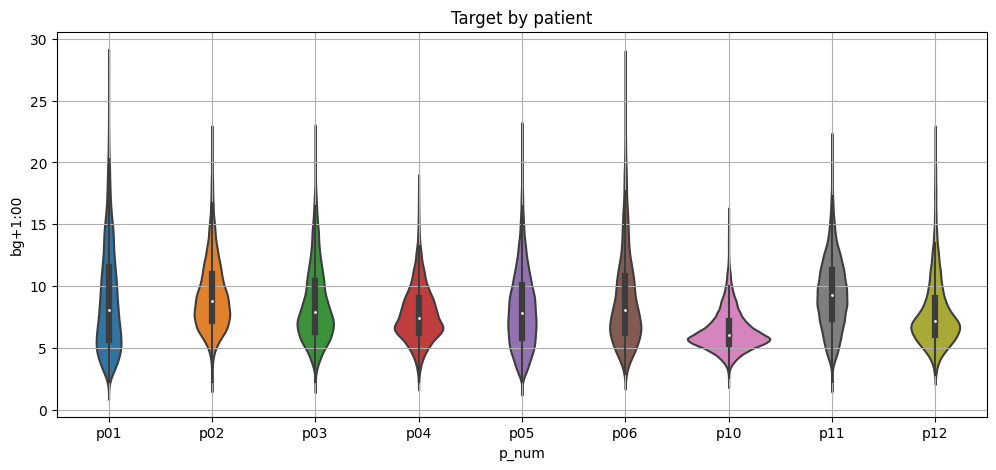

In [127]:
# plot target distribution by patient
plt.figure(figsize=(12,5))
sns.violinplot(data=train_csv, x='p_num', y='bg+1:00')
plt.title('Target by patient')
plt.grid()
plt.show()



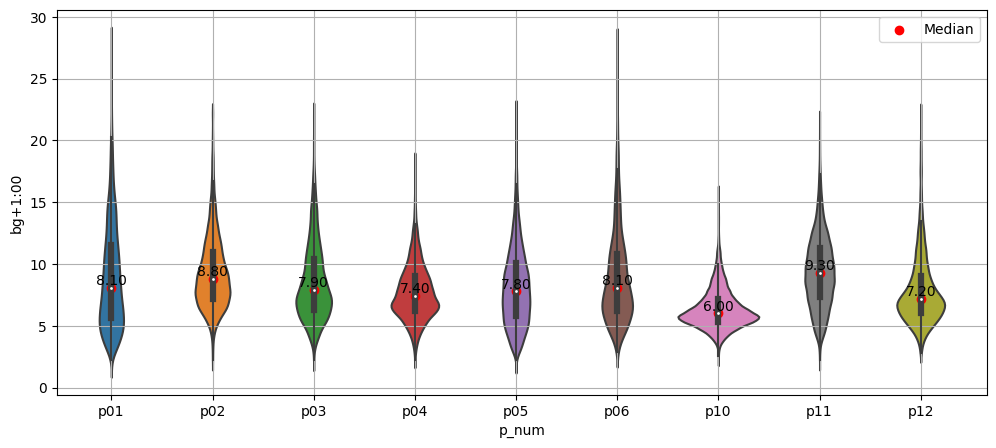

In [128]:
plt.figure(figsize=(12,5))
sns.violinplot(data=train_csv, x='p_num', y='bg+1:00')
# Calculate the medians for each category in 'p_num'
medians = train_csv.groupby('p_num')['bg+1:00'].median().values
# Get the positions of each category on the x-axis
positions = range(len(medians))
# Overlay the median values using plt.scatter (or plt.plot for connecting lines)
plt.scatter(positions, medians, color='red', marker='o', label='Median')
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', color='black', ha='center', va='bottom')
# Optionally, add a legend
plt.legend()
plt.grid()

### Following points can be made about the patients

1. po1 : has quite a big range of blood sugar value but mostly concerntrated on the lower end.
2. p02 : Median blood sugar is a bit higher than p01 but not as widespread as p01
3. p03 : Median almost similar same as p01, most values are conerntrated a bit below the median, not as widesprad as p01
4. p04 : Median lower previous 3 patients and most of the time p04 have a lower blood sugar than the median as maximum number of data points are concerntrated a bit lower than the median.
5. p05 : Quite spread out values with maximum number of data points occuring a bit below the median.
6. p06 : Has a wide range of blood sugar values and the median is 8.10.
7. p10 : Has the best blood segar level. The range of BS level is quite compact compared to other patients and from the plot it is evident throughout the day the BS is mostly around the median.
8. p11 : The worst patient until now. Values are quite spread out and evidently most of the data points occur around the medians.
9. p12 : Most number od data points are concerntrated around the median.



# Time Series Analysis #

In [129]:
# Adding a column for miniute
train_csv['time_min'] = train_csv.hour * 60 + train_csv.time.apply(lambda x : x.minute)
train_csv.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,hour,time_min
0,p01_0,p01,1900-01-01 06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,6,370
1,p01_1,p01,1900-01-01 06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,6,385
2,p01_2,p01,1900-01-01 06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,6,400
3,p01_3,p01,1900-01-01 06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,6,415
4,p01_4,p01,1900-01-01 07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,7,430


In [130]:
# Unique hour values in our data
unique_hour_values = [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

### Here I want to explore how every hour the blood sugar value is for the patients.
1. Explore the distribution of target w.r.t the minutes column. From the minutes column we know the time of the day

In [131]:
"""
function to plot the target vs minutes
"""
def plot_target_vs_minutes(patient, color):
    df_sel = train_csv[train_csv.p_num==patient]
    plt.figure(figsize=(14,4))
    plt.scatter(df_sel.time_min, df_sel["bg+1:00"], color=color, alpha=0.2, s=5)
    plt.title(patient)
    plt.grid()
    plt.show()


['p06', 'p05', 'p11', 'p10', 'p02', 'p03', 'p04', 'p12', 'p01']


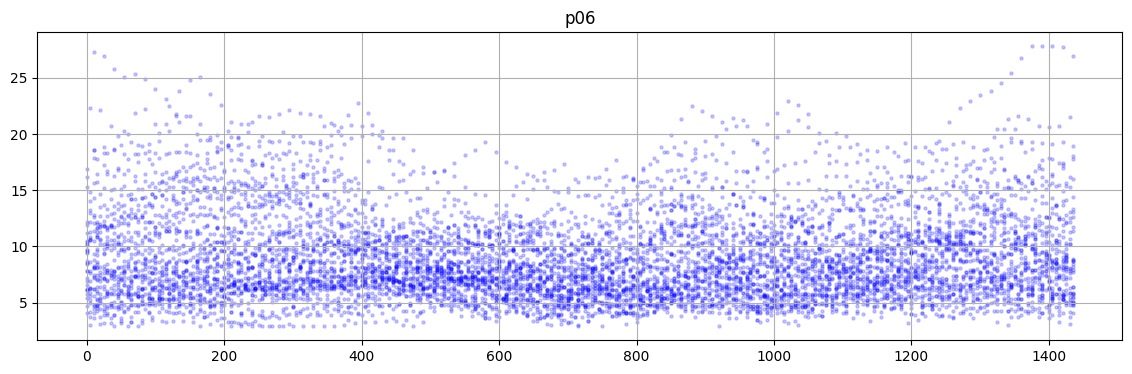

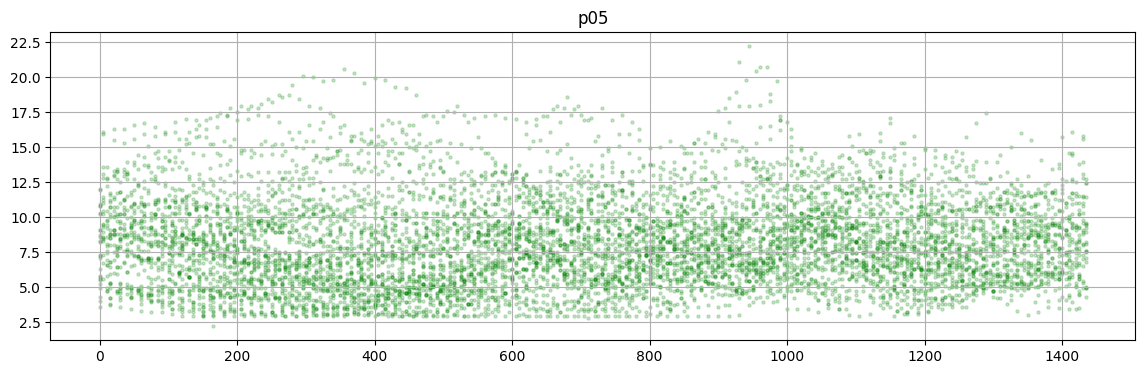

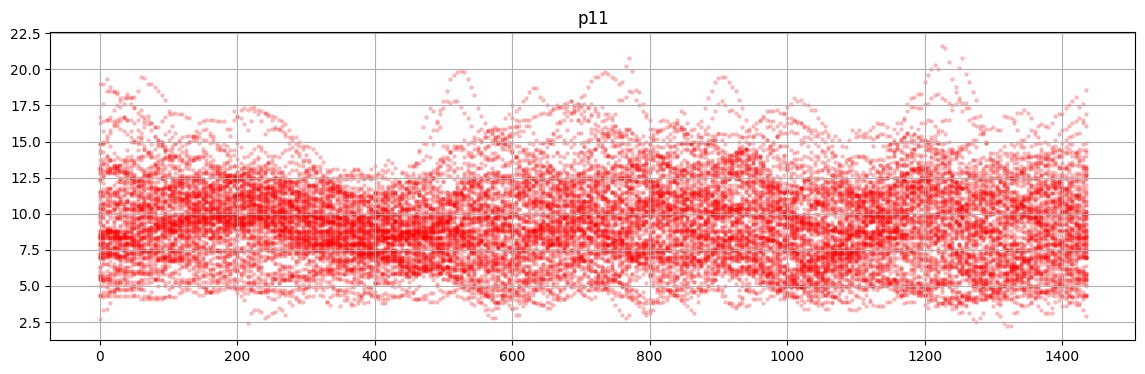

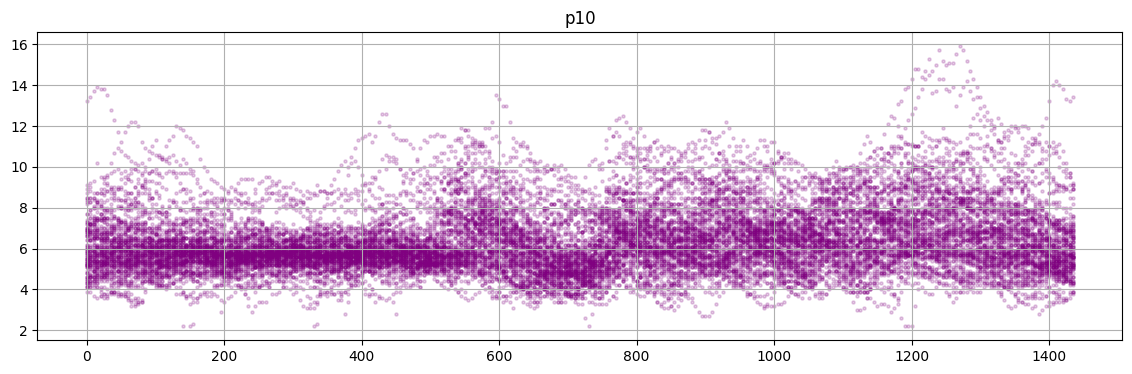

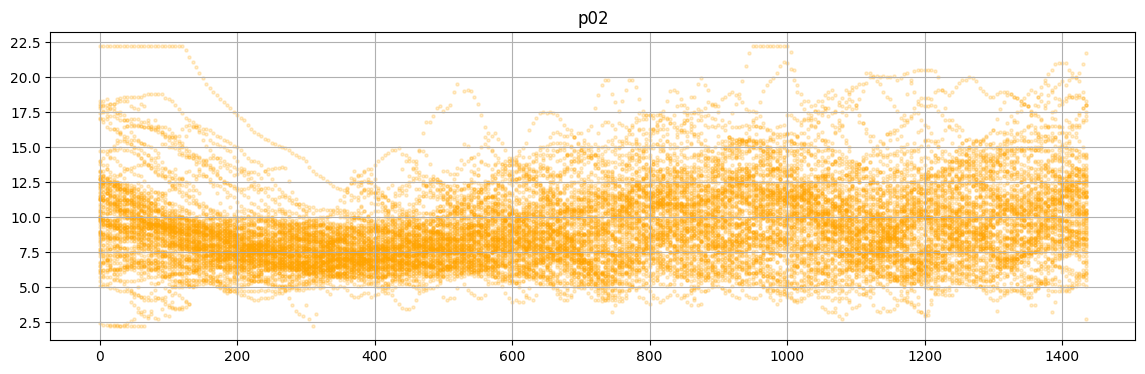

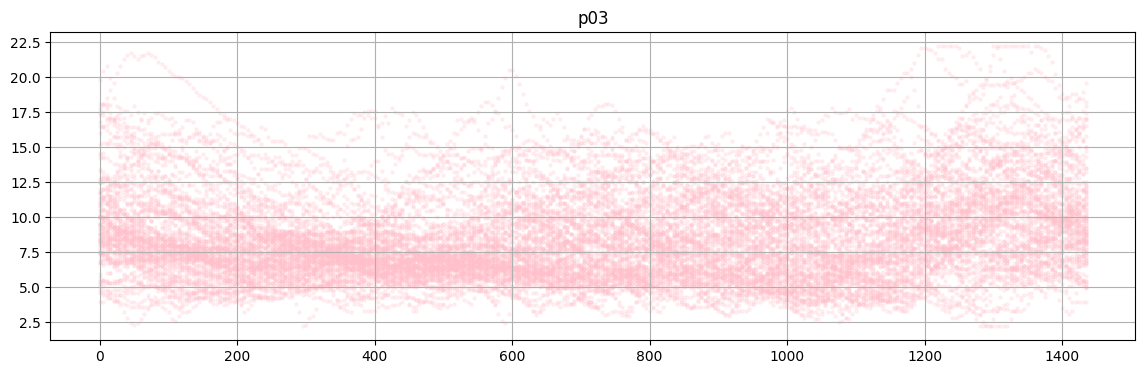

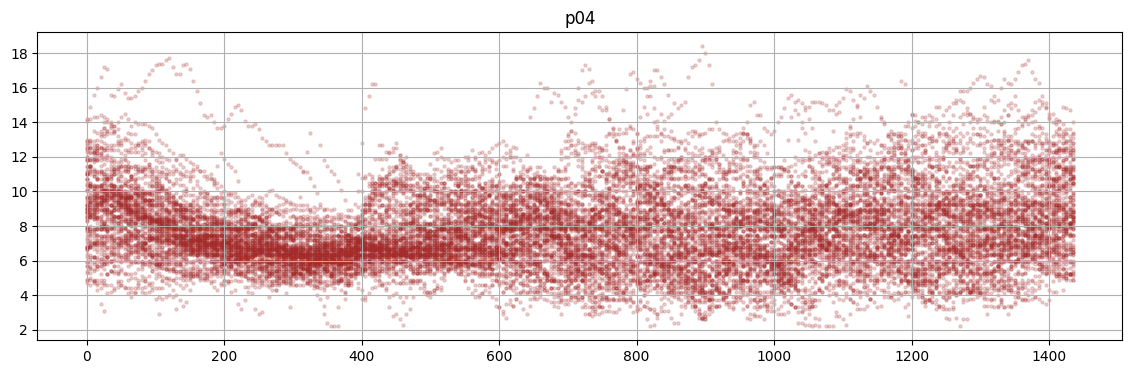

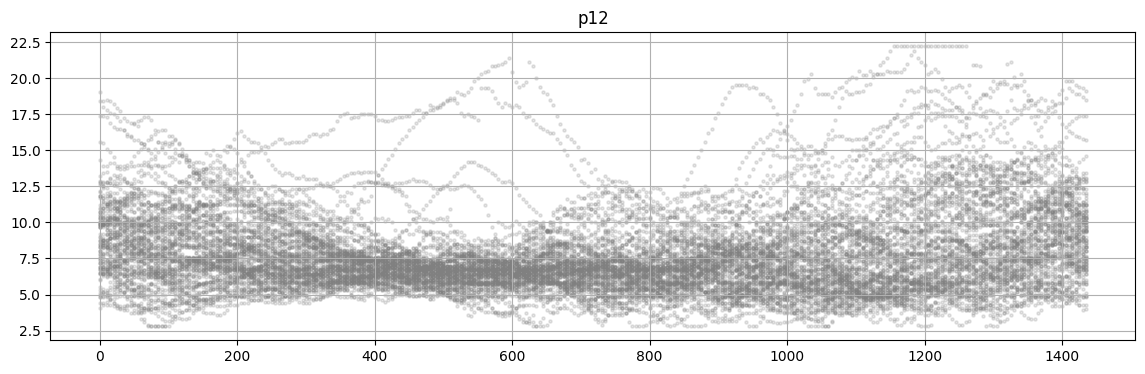

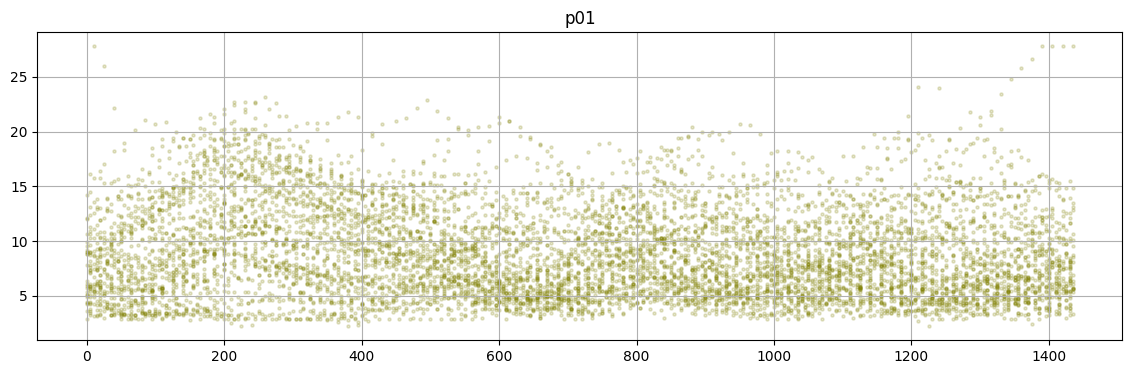

In [132]:
patient = list(set(train_csv["p_num"]))
print(patient)
color = ['blue',
'green',
'red',
'purple',
'orange',
'pink',
'brown',
'gray',
'olive']

for p, c in zip(patient, color):
    plot_target_vs_minutes(p, c)

### Now the qustion is why p10 and p11 is so different. What p10 is doing so well that the blood suagr is so controlled
### Hence I would like to explore a little bit with p10 and p11 to get some more insights

In [133]:
"""
One way to get this is the total calories burnt time wise
"""
def plot_calories_vs_time(patient, color):
    # get the patient df
    df_patient = train_csv[train_csv["p_num"] == patient]
    # get all the columns that are associate with calories
    calorie_columns = list(df_patient.columns[df_patient.columns.str.startswith('cals-')])
    df_patient["avg_calorie"] = df_patient[calorie_columns].mean(axis=1)
    plt.figure(figsize=(14,4))
    plt.scatter(df_patient.time_min, df_patient["avg_calorie"], color=color, alpha=0.2, s=5)
    plt.title(patient + "_avg_calories_burnt")
    plt.xlabel("Minutes")
    plt.ylabel("Calories burnt")
    plt.grid()
    plt.show()

/tmp/ipykernel_30/630238601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patient["avg_calorie"] = df_patient[calorie_columns].mean(axis=1)


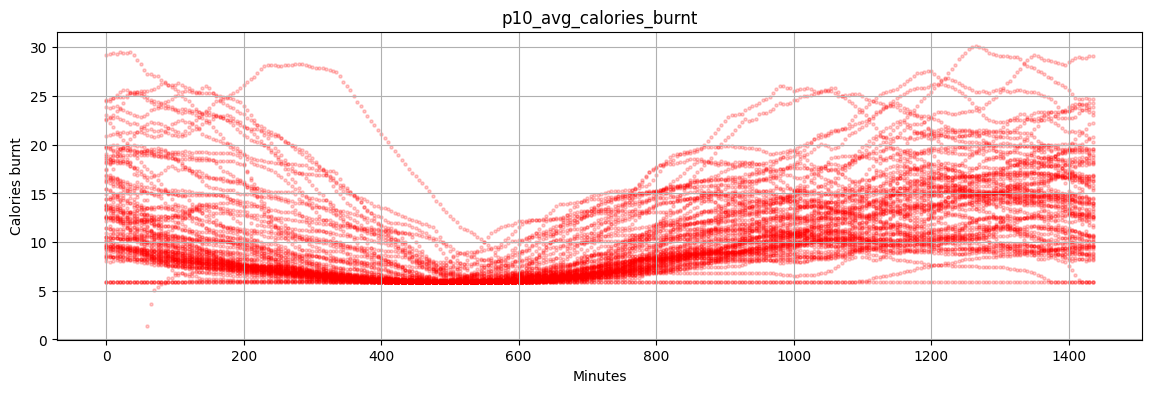

In [134]:
plot_calories_vs_time("p10", 'red')

/tmp/ipykernel_30/630238601.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patient["avg_calorie"] = df_patient[calorie_columns].mean(axis=1)


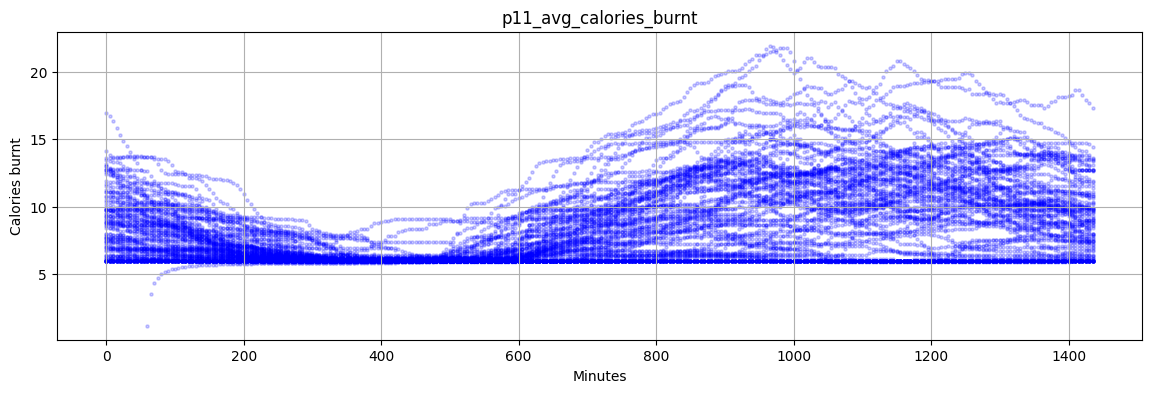

In [135]:
plot_calories_vs_time("p11", 'blue')

## Comparison of Calorie burnt for p10 and p11

/tmp/ipykernel_30/2264121716.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patient1["avg_calorie"] = df_patient1[calorie_columns].mean(axis=1)
/tmp/ipykernel_30/2264121716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_patient2["avg_calorie"] = df_patient2[calorie_columns].mean(axis=1)


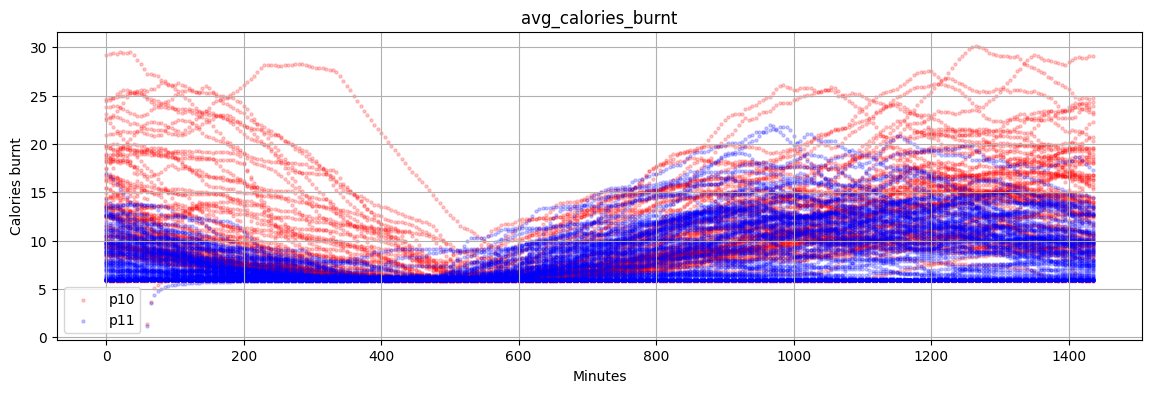

In [136]:
# combining the two plots
df_patient1 = train_csv[train_csv["p_num"] == "p10"]
df_patient2 = train_csv[train_csv["p_num"] == "p11"]
# get all the columns that are associate with calories
calorie_columns = list(df_patient1.columns[df_patient1.columns.str.startswith('cals-')])
df_patient1["avg_calorie"] = df_patient1[calorie_columns].mean(axis=1)
df_patient2["avg_calorie"] = df_patient2[calorie_columns].mean(axis=1)

plt.figure(figsize=(14,4))
plt.scatter(df_patient1.time_min, df_patient1["avg_calorie"], color="red", alpha=0.2, s=5, label = "p10")
plt.scatter(df_patient2.time_min, df_patient2["avg_calorie"], color="blue", alpha=0.2, s=5, label = "p11")
plt.title("avg_calories_burnt")
plt.xlabel("Minutes")
plt.ylabel("Calories burnt")
plt.legend()
plt.grid()
plt.show()

### Hence on an average throughout the day we see that p10 burns a lot of calories compared to p11